In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

Found 6749 files belonging to 7 classes.


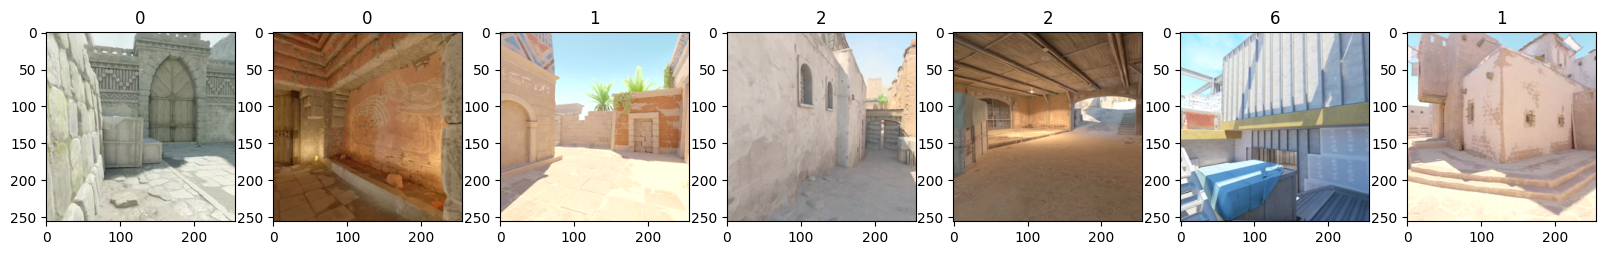

In [3]:
data = tf.keras.utils.image_dataset_from_directory('maps')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [4]:
dataset_path = 'maps'
img_height = 24
img_width = 24
batch_size = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.15,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.15,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6749 files belonging to 7 classes.
Using 5737 files for training.
Found 6749 files belonging to 7 classes.
Using 1012 files for validation.


In [5]:
class_names = train_dataset.class_names
print("Classes :", class_names)

Classes : ['ancient', 'anubis', 'dust2', 'inferno', 'mirage', 'nuke', 'vertigo']


In [6]:
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names))
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=25)

Epoch 1/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2305 - loss: 1.8471 - val_accuracy: 0.3518 - val_loss: 1.5527
Epoch 2/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4096 - loss: 1.4585 - val_accuracy: 0.5030 - val_loss: 1.3142
Epoch 3/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5163 - loss: 1.2406 - val_accuracy: 0.5998 - val_loss: 1.0485
Epoch 4/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6036 - loss: 1.0577 - val_accuracy: 0.6038 - val_loss: 1.0019
Epoch 5/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6306 - loss: 0.9853 - val_accuracy: 0.6848 - val_loss: 0.8523
Epoch 6/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6865 - loss: 0.8636 - val_accuracy: 0.6156 - val_loss: 0.9792
Epoch 7/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7108 - loss: 0.8117 - val_accuracy: 0.7312 - val_loss: 0.7417
Epoch 8/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7257 - loss: 0.7477 - val_accuracy: 0.

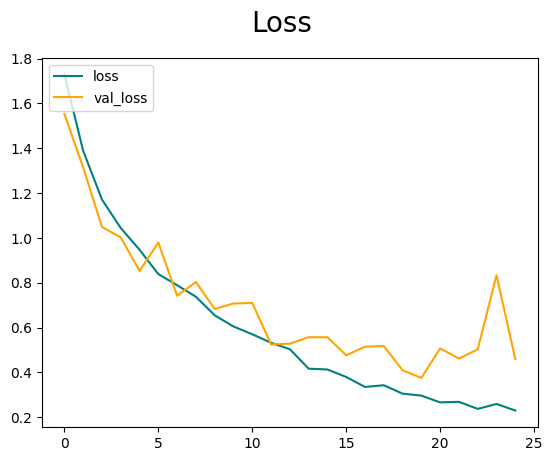

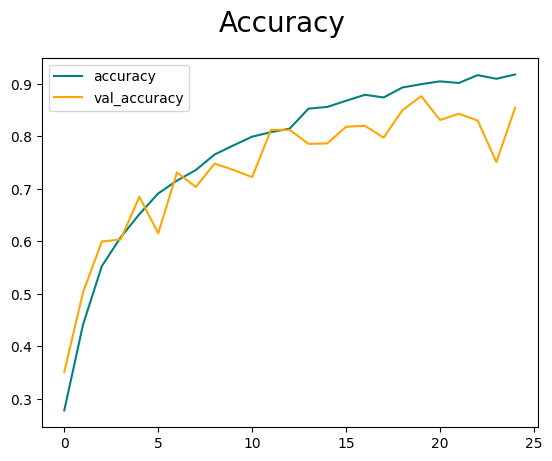

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8461 - loss: 0.4617
Test accuracy: 0.8547430634498596


In [9]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

test_loss, test_acc = model.evaluate(val_dataset)
print("Test accuracy:", test_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━

<Figure size 1000x800 with 0 Axes>

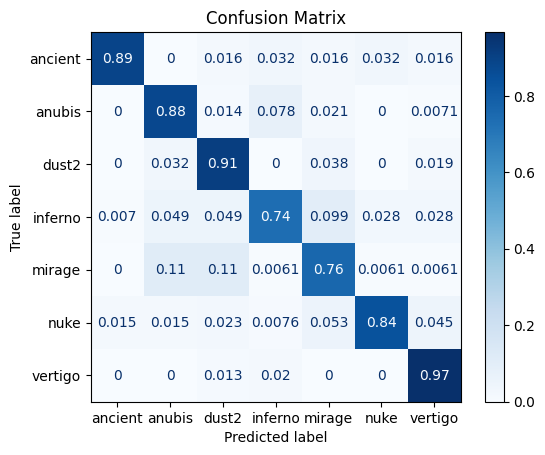

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true = []
y_pred = []

for images, labels in val_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred, normalize='true')

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()